# **I. Apprentissage supervisé : Feature engineering et Classification**

In [17]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import pickle
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings('ignore')

> transformer votre jeu de données issue de pandas qui sera de type Data Frame en numpy Array  (c.f. values) et séparer ensuite les variables caractéristiques de la variable à prédire (status) en deux tableaux différents

In [2]:
data = pd.read_csv('credit_scoring.csv', sep=';')
array = data.values

> Analyser les propriétés de vos données : taille de l’échantillon (c.f. shape), pourcentage d’exemples positifs et négatifs

In [3]:
def analyse_data (data:np.array, label:np.array) :
    taille_echantillon = data.shape[0]
    pourcentage_positif = (label == 1).sum() / taille_echantillon * 100
    pourcentage_negatif = (label == 0).sum() / taille_echantillon * 100
    print(f"Taille de l'échantillon : {taille_echantillon}")
    print(f"Pourcentage d'exemples positifs : {pourcentage_positif}%")
    print(f"Pourcentage d'exemples négatifs : {pourcentage_negatif}%")

X = array[:, :-1]  # Toutes les colonnes sauf la dernière
label = array[:, -1]   # Dernière colonne
analyse_data(X, label)


Taille de l'échantillon : 4375
Pourcentage d'exemples positifs : 72.20571428571428%
Pourcentage d'exemples négatifs : 27.794285714285717%


> Pour éviter d’avoir un résultat biaisé du classifieur que nous allons construire, séparer les données en deux parties (de taille 50% chacune) une dite d’apprentissage qui servira à l’apprentissage du classifieur  et  l’autre  dite  de  test  qui  servira  à  son  évaluation  (c.f. train_test_split  avec  un random_state=1)
>

Nous pouvons voir que le split donne des résultats coérant. (Teste sans normalisation)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.5, random_state=1)
analyse_data(X_train, y_train)
analyse_data(X_test, y_test)
# Faire ca après
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Taille de l'échantillon : 2187
Pourcentage d'exemples positifs : 72.0164609053498%
Pourcentage d'exemples négatifs : 27.983539094650205%
Taille de l'échantillon : 2188
Pourcentage d'exemples positifs : 72.39488117001828%
Pourcentage d'exemples négatifs : 27.605118829981716%


In [5]:
# arbre de désision
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# K voisin plus proche
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

# MultilayerPerceptron
mlp_model = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
mlp_model.fit(X_train, y_train)

# Fin des entrainement des différents algo

MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)

> Apprentissage  et  évaluation  de  modèles  :  Utiliser  ensuite  sur  votre  jeu  de  données  les  algorithmes d’apprentissage supervisé suivants : 
>- Un arbre CART (random_state=1) 
>- k-plus-proches-voisins avec k=5 
>- MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1

Nous avons entraîné nos modèles, sans normaliser nos données, voici le résultat. :
```
decision tree confuse
[[ 315  289]
 [ 323 1261]]
decision tree- Accuracy: 72.03%
decision tree - Precision: 81.35%
decision tree - Recall: 79.61%

neigh confuse
[[ 189  415]
 [ 187 1397]]
neigh- Accuracy: 72.49%
neigh - Precision: 77.10%
neigh - Recall: 88.19% 

MultilayerPerceptron confuse
[[ 323  281]
 [ 351 1233]]
MultilayerPerceptron- Accuracy: 71.12%
MultilayerPerceptron - Precision: 81.44%
MultilayerPerceptron - Recall: 77.84% 

Rappel :
Taille de l'échantillon : 4375
Pourcentage d'exemples positifs : 72.20571428571428%
Pourcentage d'exemples négatifs : 27.794285714285717%
Nous remarquons que nos algorithmes ont des résultats à peine égaux aux hasards.
C'est-à-dire très mauvais. Cela semble logique, car nos données non pas encore été normalisé. Nous remarquons aussi que Les algos ne sont pas bien paramètres. (Ex: arbre de prédiction ovec fiting)

Dans notre cas la banque préfèrera ne pas avoir prêté à quelqu'un qui aurait pu rembourser (minimiser faux négatif = maximiser le rappel), plus tôt que de prêter à quelqu'un qui ne va pas pouvoir rembourser (minimiser faux positif = maximiser la précision). Autrement dit, nous préférons le critère précision, soit les minimiser les faux positifs.

In [6]:
def show_predictions_result(pred, true, label="methode"):
    confuse_mlp = confusion_matrix(true, pred)
    print(f"{label} confuse")
    print(confuse_mlp)
    accuracy = accuracy_score(true, pred)
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)
    
    print(f"{label}- Accuracy: {accuracy * 100:.2f}%")
    print(f"{label} - Precision: {precision * 100:.2f}%")
    print(f"{label} - Recall: {recall * 100:.2f}% \n")
    return {"accuracy":accuracy, "precision":precision, "recall":recall}

clf_predictions = clf.predict(X_test)
clf_res = show_predictions_result(clf_predictions, y_test, "decision tree")
# Mesures de performance Pour l'abr de désision

neigh_predictions = neigh.predict(X_test)
neigh_res = show_predictions_result(neigh_predictions, y_test, "neigh")
# Mesures de performance

mlp_predictions = mlp_model.predict(X_test)
# Mesures de performance de MultilayerPerceptron
mlp_res = show_predictions_result(mlp_predictions, y_test, "MultilayerPerceptron")

def compare (arbre, knn, multilayerPerceptron):
    best_model, best_accuracy = max(
        (("knn", knn["accuracy"]), ("arbre", arbre["accuracy"]), ("multilayerPerceptron", multilayerPerceptron["accuracy"])),
        key=lambda x: x[1]
    )
    print(f"{best_model} is best accuracy with a score of {best_accuracy}")
    best_model, best_precision = max(
        (("knn", knn["precision"]), ("arbre", arbre["precision"]), ("multilayerPerceptron", multilayerPerceptron["precision"])),
        key=lambda x: x[1]
    )
    print(f"{best_model} is best precision with a score of {best_precision}")
    best_model, best_recall = max(
        (("knn", knn["recall"]), ("arbre", arbre["recall"]), ("multilayerPerceptron", multilayerPerceptron["recall"])),
        key=lambda x: x[1]
    )
    print(f"{best_model} is best recall with a score of {best_recall}")

compare(clf_res, neigh_res, mlp_res)


decision tree confuse
[[ 324  280]
 [ 321 1263]]
decision tree- Accuracy: 72.53%
decision tree - Precision: 81.85%
decision tree - Recall: 79.73% 

neigh confuse
[[ 189  415]
 [ 187 1397]]
neigh- Accuracy: 72.49%
neigh - Precision: 77.10%
neigh - Recall: 88.19% 

MultilayerPerceptron confuse
[[ 323  281]
 [ 351 1233]]
MultilayerPerceptron- Accuracy: 71.12%
MultilayerPerceptron - Precision: 81.44%
MultilayerPerceptron - Recall: 77.84% 

arbre is best accuracy with a score of 0.7253199268738574
arbre is best precision with a score of 0.8185353208036293
knn is best recall with a score of 0.8819444444444444


In [7]:
# Normalisation des données

scaler = StandardScaler()
scaler.fit(X)
X_train_scaled_trans = scaler.transform(X)

print (X_train_scaled_trans)

X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_train_scaled_trans, label, test_size=0.5, random_state=1)
# arbre de désision
clf_norm = tree.DecisionTreeClassifier()
clf_norm.fit(X_norm_train, y_train)
# K voisin plus proche
neigh_norm = KNeighborsClassifier(n_neighbors=5)
neigh_norm.fit(X_norm_train, y_train)
# MultilayerPerceptron
mlp_model_norm = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
mlp_model_norm.fit(X_norm_train, y_train)

clf_norm_predictions = clf_norm.predict(X_norm_test)
clf_norm_res = show_predictions_result(clf_norm_predictions, y_test, "decision tree")
# Mesures de performance Pour l'abr de désision

neigh_norm_predictions = neigh_norm.predict(X_norm_test)
neigh_norm_res = show_predictions_result(neigh_norm_predictions, y_test, "neigh")
# Mesures de performance

mlp_norm_predictions = mlp_model_norm.predict(X_norm_test)
# Mesures de performance de MultilayerPerceptron
mlp_norm_res = show_predictions_result(mlp_norm_predictions, y_test, "MultilayerPerceptron")

compare(clf_norm_res, neigh_norm_res, mlp_norm_res)

[[ 0.12417212  0.94505019  0.92225348 ... -0.28136029 -0.50556494
  -0.98717625]
 [ 1.10300637  0.94505019  0.92225348 ... -0.28136029 -0.07976109
   0.31890958]
 [ 0.2465264  -1.05814486 -0.71960165 ... -0.28136029  2.04925815
   2.45336265]
 ...
 [-0.97701642 -1.05814486 -1.54052921 ... -0.28136029 -1.14427071
  -0.79898408]
 [-0.97701642  0.94505019  0.10132592 ... -0.28136029 -1.03781975
  -1.46328636]
 [-0.36524501 -1.05814486  0.92225348 ...  0.54000599  0.66539564
   0.30604174]]
decision tree confuse
[[ 326  278]
 [ 327 1257]]
decision tree- Accuracy: 72.35%
decision tree - Precision: 81.89%
decision tree - Recall: 79.36% 

neigh confuse
[[ 282  322]
 [ 216 1368]]
neigh- Accuracy: 75.41%
neigh - Precision: 80.95%
neigh - Recall: 86.36% 

MultilayerPerceptron confuse
[[ 334  270]
 [ 225 1359]]
MultilayerPerceptron- Accuracy: 77.38%
MultilayerPerceptron - Precision: 83.43%
MultilayerPerceptron - Recall: 85.80% 

multilayerPerceptron is best accuracy with a score of 0.773765996343

> Normalisation  des  variables  continues  :

Tableau comparatif:

| Metric                 | Non Normalisé        | normalisé            |
|------------------------|----------------------|----------------------|
| **Decision Tree**      |                      |                      |
| Accuracy               | 72.35%               | 71.53%               |
| Precision              |   81.85%             | 81.38%               |
| Recall                 | 79.42%               | 78.66%               |
| **Neigh**              |                      |                      |
| Accuracy               | 72.49%               | 75.41%               |
| Precision              | 77.10%               | 80.95%               |
| Recall                 |   88.19%             | **86.36%**           |
| **MultilayerPerceptron**|                     |                      |
| Accuracy               | 71.12%               | **77.38%**           |
| Precision              | 81.44%               | **83.43%**           |
| Recall                 | 77.84%               | 85.80%               |

Par rapport à nos premieres données, nous pouvons dire que tout nos résultats ont augmenter sauf pour decision tree qui n'est pas sous l'influance de la normalisatin. Maintenant l'algo qui semble avoir mes meilleurs résultat est multilayerPerceptron pour l'accuracy et la precision. De plus nous avons dis que nous préfererions le critere pressision qui est ici le meilleur multilayerPerceptron.

In [8]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled_trans)
X_train_pca_combinated = np.hstack((X_train_scaled_trans, X_train_pca))
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_train_pca_combinated, label, test_size=0.5, random_state=1)

def regle_de_seuil(data, pca):
    axes_labels: List = []
    for ind, axes in enumerate(pca.components_):
        print("variables selectionnées pour axes",ind)
        label_res: str = ""
        for mois, poid in zip(data.columns[1:], axes):
            if abs(poid) >= 1/np.sqrt(len(data.columns[1:]) - 0.02):
                print(poid, mois)
                if(poid<0):
                    label_res += '-'+mois+ ", "
                else:
                    label_res += mois+ ", "
        axes_labels.append("description de l'axe "+str(ind)+": "+label_res)
        print("\n")
    return axes_labels
regle_de_seuil(data, pca)
print("taux d'information conservé avec 3 dimension de la pca :",sum(pca.explained_variance_ratio_))

variables selectionnées pour axes 0
0.33725425001431103 Home
-0.3468430488961862 Time
0.4049103338539558 Marital
-0.4064454566103932 Records
0.31090974785392433 Income
0.2904013738758477 Debt
0.29224087181923825 Status


variables selectionnées pour axes 1
0.3876246503271713 Age
0.5945865365308063 Price
0.5008414909714118 Status


variables selectionnées pour axes 2
-0.2956337284685791 Time
-0.3237236229490666 Age
0.47293305416033393 Expenses
-0.3439717813083926 Income
0.5348874184917022 Debt
0.31057264924158495 Amount


taux d'information conservé avec 3 dimension de la pca : 0.4430569133521199


> Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales : Il est
parfois utile pour certains classifieurs de faire une réduction de dimensions sur les données afin de déceler
et créer certaines combinaisons linéaires dans les variables descriptives et augmenter ainsi le pouvoir
discriminant du classifieur. Appliquer une ACP (module PCA de Scikit-learn) sur vos données et garder les 3
premières nouvelles dimensions en les concaténant à vos données normalisées de l’étape précédente.
Exécuter à nouveau votre fonction sur vos nouvelles données. Que se passe-t-il ?

Le taux d'information pour 3 variable est de : 0.44, nous pouvons déduire que le pca n'est pas pertinent pour 3 variables...

In [9]:
print (X_train_pca)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_train_pca_combinated, label, test_size=0.5, random_state=1)


# X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_train_pca, label, test_size=0.5, random_state=1)
# arbre de désision
clf_pca = tree.DecisionTreeClassifier()
clf_pca.fit(X_pca_train, y_pca_train)
# K voisin plus proche
neigh_pca = KNeighborsClassifier(n_neighbors=5)
neigh_pca.fit(X_pca_train, y_pca_train)
# MultilayerPerceptron
mlp_model_pca = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
mlp_model_pca.fit(X_pca_train, y_pca_train)

clf_pca_predictions = clf_pca.predict(X_pca_test)
clf_pca_res = show_predictions_result(clf_pca_predictions, y_pca_test, "decision tree")
# Mesures de performance Pour l'abr de désision

neigh_pca_predictions = neigh_pca.predict(X_pca_test)
neigh_pca_res = show_predictions_result(neigh_pca_predictions, y_pca_test, "neigh")
# Mesures de performance

mlp_pca_predictions = mlp_model_pca.predict(X_pca_test)
# Mesures de performance de MultilayerPerceptron
mlp_pca_res = show_predictions_result(mlp_pca_predictions, y_pca_test, "MultilayerPerceptron")

compare(clf_pca_res, neigh_pca_res, mlp_pca_res)

[[-0.59063681 -0.50140677 -0.75576217]
 [-0.03365955  0.054126   -0.85098032]
 [ 3.05596106  1.58730331 -0.02089386]
 ...
 [-0.54993507 -1.78661792  1.25073621]
 [-2.82754524 -0.27174898  0.54129369]
 [ 0.7363677   0.85264748  0.54884128]]
decision tree confuse
[[ 325  279]
 [ 333 1251]]
decision tree- Accuracy: 72.03%
decision tree - Precision: 81.76%
decision tree - Recall: 78.98% 

neigh confuse
[[ 286  318]
 [ 207 1377]]
neigh- Accuracy: 76.01%
neigh - Precision: 81.24%
neigh - Recall: 86.93% 

MultilayerPerceptron confuse
[[ 321  283]
 [ 214 1370]]
MultilayerPerceptron- Accuracy: 77.29%
MultilayerPerceptron - Precision: 82.88%
MultilayerPerceptron - Recall: 86.49% 

multilayerPerceptron is best accuracy with a score of 0.7728519195612431
multilayerPerceptron is best precision with a score of 0.8287961282516636
knn is best recall with a score of 0.8693181818181818


### Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiale

| Metric                 | NORM                 | PCA                  |
|------------------------|----------------------|----------------------|
| **Decision Tree**      |                      |                      |
| Accuracy               | 72.12%               | 72.58%               |
| Precision              | 81.71%               | 82.33%               |
| Recall                 | 79.23%               | 79.10%               |
| **Neigh**              |                      |                      |
| Accuracy               | 75.41%               | 76.01%               |
| Precision              | 80.95%               | 81.24%               |
| Recall                 | **86.36%**           | **86.93%**           |
| **MultilayerPerceptron**|                     |                      |
| Accuracy               | **77.38%**           | **77.29%**           |
| Precision              | **83.43%**           | **82.88%**           |
| Recall                 | 85.80%               | 86.49%               |


Nous remarquons que de très faible changement. Glogbalement de petites augmentations, mais le meilleur algo MultilayerPerceptron subis de petites diminution.  
Il faut prendre l'algo MultilayerPerceptron normaliser mais sans ACP.


[[-0.73230786  0.94505019  0.10132592 ... -0.28136029  0.13314083
   0.00686444]
 [ 0.85829781 -1.05814486 -1.54052921 ... -0.28136029 -0.95265898
   0.53605439]
 [-0.85466214  0.94505019  0.10132592 ... -0.28136029  0.55894468
   0.11784957]
 ...
 [ 0.36888068  0.94505019 -2.36145678 ... -0.28136029 -1.57007456
   0.03099164]
 [-0.97701642  0.94505019  0.10132592 ... -0.28136029 -0.93136879
  -0.01243732]
 [-0.85466214  0.94505019 -0.71960165 ... -0.28136029  0.34604276
   1.16818706]]
['Income' 'Seniority' 'Price' 'Amount' 'Age' 'Assets' 'Expenses' 'Records'
 'Time' 'Job' 'Debt' 'Home' 'Marital']


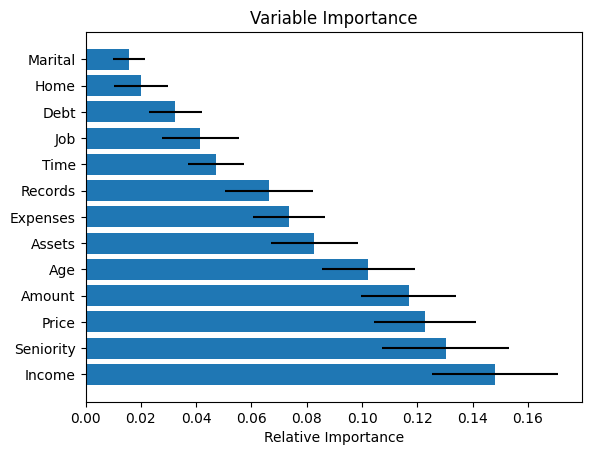

In [10]:
clf = RandomForestClassifier(n_estimators=1000,random_state=1) 
clf.fit(X_norm_train, y_train) 
print (X_norm_train)
importances=clf.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) 
 
sorted_idx = np.argsort(importances)[::-1] 
nom_cols = np.array(list(data.columns))
features = nom_cols 
print(features[sorted_idx]) 
 
padding = np.arange(X_norm_train.size/len(X_norm_train)) + 0.5  
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')  
plt.yticks(padding, features[sorted_idx])  
plt.xlabel("Relative Importance") 
plt.title("Variable Importance")  
plt.show() 


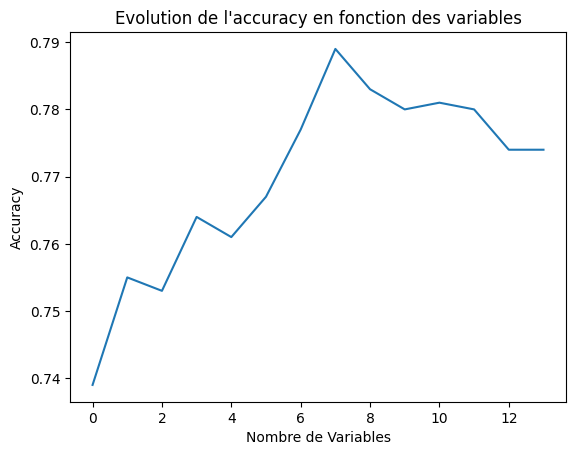

In [11]:
mlp_model_norm = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
mlp_model_norm.fit(X_norm_train, y_norm_train)
scores=np.zeros(X_norm_train.shape[1]+1)  
for f in np.arange(0, X_norm_train.shape[1]+1):  
 
 
    X1_f = X_norm_train[:,sorted_idx[:f+1]] 
    X2_f = X_norm_test [:,sorted_idx[:f+1]] 
    mlp_model_norm.fit(X1_f,y_norm_train) 
    YMLP=mlp_model_norm.predict(X2_f) 
    scores[f]=np.round(accuracy_score(y_norm_test,YMLP),3)  
plt.plot(scores) 
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy") 
plt.title("Evolution de l'accuracy en fonction des variables") 
plt.show()

> Sélection de variables : Même si vous utilisez le meilleur algorithme d’apprentissage, la présence de
variables bruitées pourra avoir un impact négatif sur les résultats d’apprentissage. La sélection de variables
est un processus très important en apprentissage supervisé. Il consiste à sélectionner le sous-ensemble de
variables les plus pertinentes (en enlevant le bruit et la redondance) à partir de la série de variables
candidates permettant de mieux expliquer et prédire votre target. Dans la suite, vous allez utiliser la
méthode Random Forest de Scikit-learn pour déterminer quelles sont les meilleures variables pour prédire
si une personne va payer son crédit ou pas.

Nous remarquons avec notre algo mlp que pour maximiser l'accuracy il faut selectioner les 7 variables les plus importantes. Soit :
|     |    |
| :-- | --- |
|n°1 |Income|
|N°2|Seniority|
|n°3|Price |
|n°4|Amount|
|n°5|Age|
|n°6|Assets|
|N°7|Expenses|


> Paramétrage des classifieurs : Dans cette partie, vous allez utiliser la fonction GridSearchCV de scikit-learn
afin de tuner les paramètres de votre meilleur algorithme. Vous allez choisir les meilleurs paramètres qui
optimisent au mieux le critère suivant : (accuracy+précision)/2

In [12]:
def custom_score(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    return (accuracy + precision) / 2

param_grid = {
    'hidden_layer_sizes': [(50,),(100,),(150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}
custom_scorer = make_scorer(custom_score, beta=2)
mlp_model_tune = MLPClassifier()
#grid_search = GridSearchCV(mlp_model_tune, scoring=custom_score, param_grid=param_grid)

#grid_search.fit(X_norm_train, y_norm_train)
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

NameError: name 'grid_search' is not defined

> Création d’un pipeline : Dans cette partie vous allez automatiser l’enchainement des traitements effectués
précédemment (Normalisation ou non, ACP ou non et Construction du classifieur) dans un pipeline (module
pipeline.Pipeline de Scikit-learn). Sauvegarder ensuite votre pipeline dans un pickle afin de pouvoir l’utiliser
dans une phase de scoring (Donner le code permettant son utilisation).

In [20]:
def build_pipeline(model, X_train, Y_train):
    pipeline_steps = [
        ('normalization', StandardScaler()),
        ('pca', PCA(n_components=3)),
        ('classifier', model)
    ]
    pipe = Pipeline(pipeline_steps)
    pipe.fit(X_train, y_train)

    model_name = type(model).__name__
    with open(f'{model_name}.pkl', 'wb') as file:
        pickle.dump(pipe, file)
    return pipe

build_pipeline(MLPClassifier(), X_train, y_train)

def scoring_pipeline(model, )

Pipeline(steps=[('normalization', StandardScaler()),
                ('pca', PCA(n_components=3)), ('classifier', MLPClassifier())])

> Comparaison de plusieurs algorithmes d’apprentissage : Utiliser ensuite sur votre jeu de données les
algorithmes d’apprentissage supervisé suivants :
> - NaiveBayesSimple
> - Un arbre CART
> - Un arbre ID3
> - Un Decision Stump
> - MultilayerPerceptron à deux couches de tailles respectives 20 et 10 par exemple
> - k-plus-proches-voisins avec k=5 par exemple
> - Bagging avec 200 classifieurs par exemple
> - AdaBoost avec 200 classifieurs par exemple
> - Random Forest avec 200 classifieurs par exemple
> - Un XGboost avec 200 classifieurs par exemple
> - Etc.

# **II. Apprentissage supervisé : Données hétérogènes**